In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1475803788e34729b1831b3dede7590b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OlO1V-m3mcx76fa3zVf6xusN8i_AsflrvkypWLY6RCsU',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1475803788e34729b1831b3dede7590b.get_object(Bucket='classificationonbreastcancerdatas-donotdelete-pr-c28cmajmap45f9',Key='cell_samples.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
data = pd.read_csv(body)
data.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
data.shape #it will give the number or rows and columns
data.size #it will give the total number of entries.
data.count # it will give the number of entires with respective columns.
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

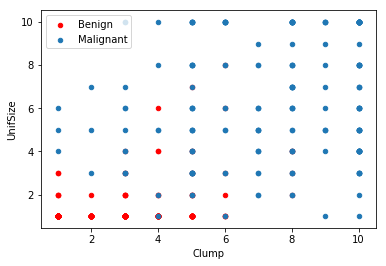

In [5]:
benign_data = data[data['Class']==2][0:200]
malignant_data =data[data['Class']==4][0:200]


axes = benign_data.plot(kind='scatter',x = 'Clump', y ='UnifSize', label ='Benign',color ='r')

malignant_data.plot(kind='scatter', x = 'Clump', y ='UnifSize', label= 'Malignant', ax =axes)

In [6]:
#ata = data[pd.to_numeric(data['BareNuc']).notnull()]
#ata['BareNuc'] = data['BareNuc'].astype('int')
data.dtypes


ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
# as id column is not as much useful for us so reomove that unwanted column and get the new neccessery dataframe
ndata = data[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BlandChrom','NormNucl','Mit']]

X = np.asarray(ndata)


In [8]:
y = np.asarray(data['Class'])
#y[0:5]

In [77]:
# now Dividing whole dataset into training and testing datasets in .8 ratio.
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

#X_train.shape
#y_train.shape
#X_test.shape
#y_test.shape

(140,)

In [79]:
#Now using SUpport Vector machine algorithm for classification
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma ='auto',C=2)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97        88
           4       0.98      0.90      0.94        52

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



In [90]:
#extra
l1 = data['Class'].tolist()
lm = []
lb = []
for i in l1:
    if i==4:
        lm.append(i)
for j in l1:
    if j==2:
        lb.append(j)

458